In [38]:
from datetime import timedelta, datetime, time, date
import requests
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import pandas as pd
import streamlit as st

In [39]:
datetime.strftime(date.today(), '%Y-%m-%d')

'2023-10-24'

In [40]:
addr = '0xc9becdbc62efb867cb52222b34c187fb170379c6'

end = datetime.strftime(date.today() + timedelta(days=1), '%Y-%m-%d')
start = datetime.strftime(date.today() - timedelta(days=7), '%Y-%m-%d')
timeFrame = 'hour'

# u1 = 'https://api-v2.pendle.finance/core/v2/1/markets/0xc9becdbc62efb867cb52222b34c187fb170379c6/history?time_frame=hour&timestamp_start=2023-10-19&timestamp_end=2023-10-20'
u = 'https://api-v2.pendle.finance/core/v2/1/markets/' + addr + '/history?time_frame=' + timeFrame + '&timestamp_start=' + start + '&timestamp_end=' + end

r = requests.get(u)
res = r.json()['results'] # timestamp,  'underlyingInterestApy', 'underlyingRewardApy', 'underlyingApy',
                        # 'impliedApy','ytFloatingApy' ,'ptDiscount'

ts_lst = []
underlyingInterestAPY_lst = []
underlyingRewardAPY_lst = []
underlyingAPY_lst = []
impliedAPY_lst = []
longYieldAPY = []
ptPrice = []
ytPrice = []

for i in range(0, len(res)):
    ts_lst.append(res[i]['timestamp'])
    underlyingInterestAPY_lst.append(res[i]['underlyingInterestApy'])
    underlyingRewardAPY_lst.append(res[i]['underlyingRewardApy'])
    underlyingAPY_lst.append(res[i]['underlyingApy'])
    impliedAPY_lst.append(res[i]['impliedApy'])
    longYieldAPY.append(res[i]['ytFloatingApy'])
    ytPrice.append(res[i]['ptDiscount'])
    ptPrice.append(1.0 - res[i]['ptDiscount'])

In [41]:
with open('pendleData.pkl', 'rb') as fp:
    tmpDict = pickle.load(fp)

util_ts = []
crvUtil = []

for j in tmpDict.keys():
    util_ts.append(datetime.fromtimestamp(tmpDict[j][7]).isoformat())
    crvUtil.append(tmpDict[j][5])

In [42]:
l = len(util_ts)
num_labels = 9
div = math.floor((l - 2) / num_labels)

util_ts_labels = []
util_ts_labels.append(util_ts[0])
for k in range(1, num_labels):
    idx = k * div
    util_ts_labels.append(util_ts[idx])

util_ts_labels.append(util_ts[l - 1])

# util_ts_labels

In [43]:
def avg_lst(lst):
    return sum(lst) / len(lst)

avg_crv_util = avg_lst(crvUtil)

def median_lst(lst):
    test_lst = lst.copy()
    test_lst.sort()
    mid = len(test_lst) // 2
    res = (test_lst[mid] + test_lst[~mid]) / 2

    return res

median_crv_util = median_lst(crvUtil)

In [44]:
def time_diff(lst):
    strt = datetime.fromisoformat(lst[0])
    end = datetime.fromisoformat(lst[len(lst) - 1])
    return (end - strt).total_seconds()

util_ts_1 = []
for ts in util_ts:
    util_ts_1.append(str(ts))

diff = time_diff(util_ts_1)

secs_in_day = 86400
days = diff / secs_in_day
buckets = math.ceil(days)

bucket_diff = diff / 2

util_secs = []
for x in util_ts:
    conv = datetime.fromisoformat(str(x)) - datetime(1900,1,1)
    s = conv.total_seconds()
    util_secs.append(s)

tsdf = pd.DataFrame({
    'ts': util_secs,
    'util': crvUtil
})

tsdf_1 = tsdf.loc[tsdf['ts'] <= (util_secs[0] + bucket_diff)]

tsdf_2 = tsdf.loc[tsdf['ts'] >= (util_secs[0] + bucket_diff)]

avg_df_1 = avg_lst(tsdf_1['util'])
avg_df_2 = avg_lst(tsdf_2['util'])

In [45]:
util_ts_labels_sh = []
for val in util_ts_labels:
    util_ts_labels_sh.append(val[0:10] + '\n' + val[11:16])

In [46]:
sns.set_theme()
sns.set_style()

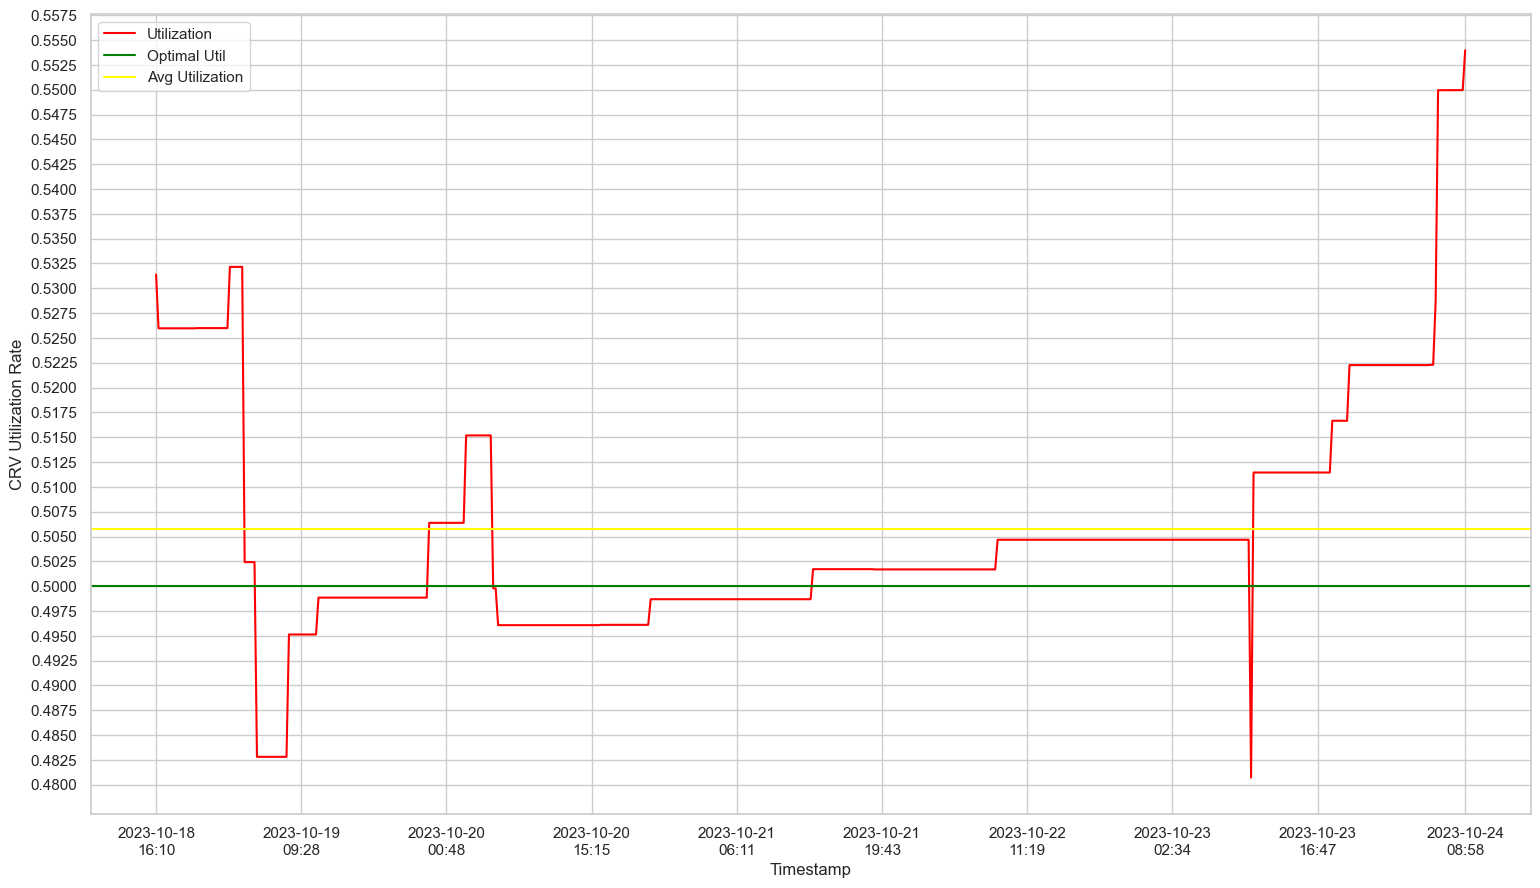

In [47]:
sns.set_style('whitegrid')

rng_fmt = []
rng = pd.date_range(start= util_ts[0], end=util_ts[len(util_ts) - 1], periods=12)
for val in util_ts_labels:
    rng_fmt.append(val[0:10] + '\n' + val[11:16])
# u = np.empty(len(util_ts))
# u.fill(uopt)
# a = np.empty(len(util_ts))
# a.fill(avg_crv_util)
#
# util_df['Util Optimal'] = u
# util_df['Avg Util'] = a
#
#
# sns.lineplot(util_df, palette='Spectral', linewidth=1)


fig = plt.figure(figsize=(18,10))

uopt = 0.50

ax = fig.add_axes([0.1,0.1,0.8,0.8])

ax.plot(util_ts, crvUtil, color='red')

ax.set_xticks(util_ts_labels)

ax.set_xticklabels(rng_fmt)

s, e = ax.get_ylim()
ax.set_yticks(np.arange(round(s, 2),e ,0.0025))

plt.axhline(y = uopt, color = 'green', linestyle = '-')
plt.axhline(y = avg_crv_util, color = 'yellow', linestyle = '-')

plt.xlabel('Timestamp')
plt.ylabel('CRV Utilization Rate')

ax.legend(['Utilization', 'Optimal Util', 'Avg Utilization'])

plt.show()

In [20]:
# impliedAPY_lst
# longYieldAPY
# ptPrice
# ytPrice
#ts_lst

d = {
    'Timestamp': ts_lst,
    'Implied APY': impliedAPY_lst,
    'Underlying APY': underlyingAPY_lst,
    'LongYield APY': longYieldAPY,
    'PT Px': ptPrice,
    'YT Px': ytPrice
}

df = pd.DataFrame(d)
df

chart_data = pd.DataFrame(df['Timestamp'], df['Implied APY'])
st.line_chart(chart_data)

DeltaGenerator()

In [12]:
def ts_labels_pick(ts):
    l = len(ts)
    num_labels = 9
    div = math.floor((l - 2) / num_labels)

    util_ts_labels = []
    util_ts_labels.append(ts[0])
    for k in range(1, num_labels):
        idx = k * div
        util_ts_labels.append(ts[idx])

    util_ts_labels.append(ts[l - 1])
    return util_ts_labels

new_labels = ts_labels_pick(df['Timestamp'])

def ts_labels(ts):
    util_ts_labels_sh = []
    for val in ts:
        util_ts_labels_sh.append(val[0:10] + '\n' + val[11:16])
    return util_ts_labels_sh

new_labels_final = ts_labels(new_labels)

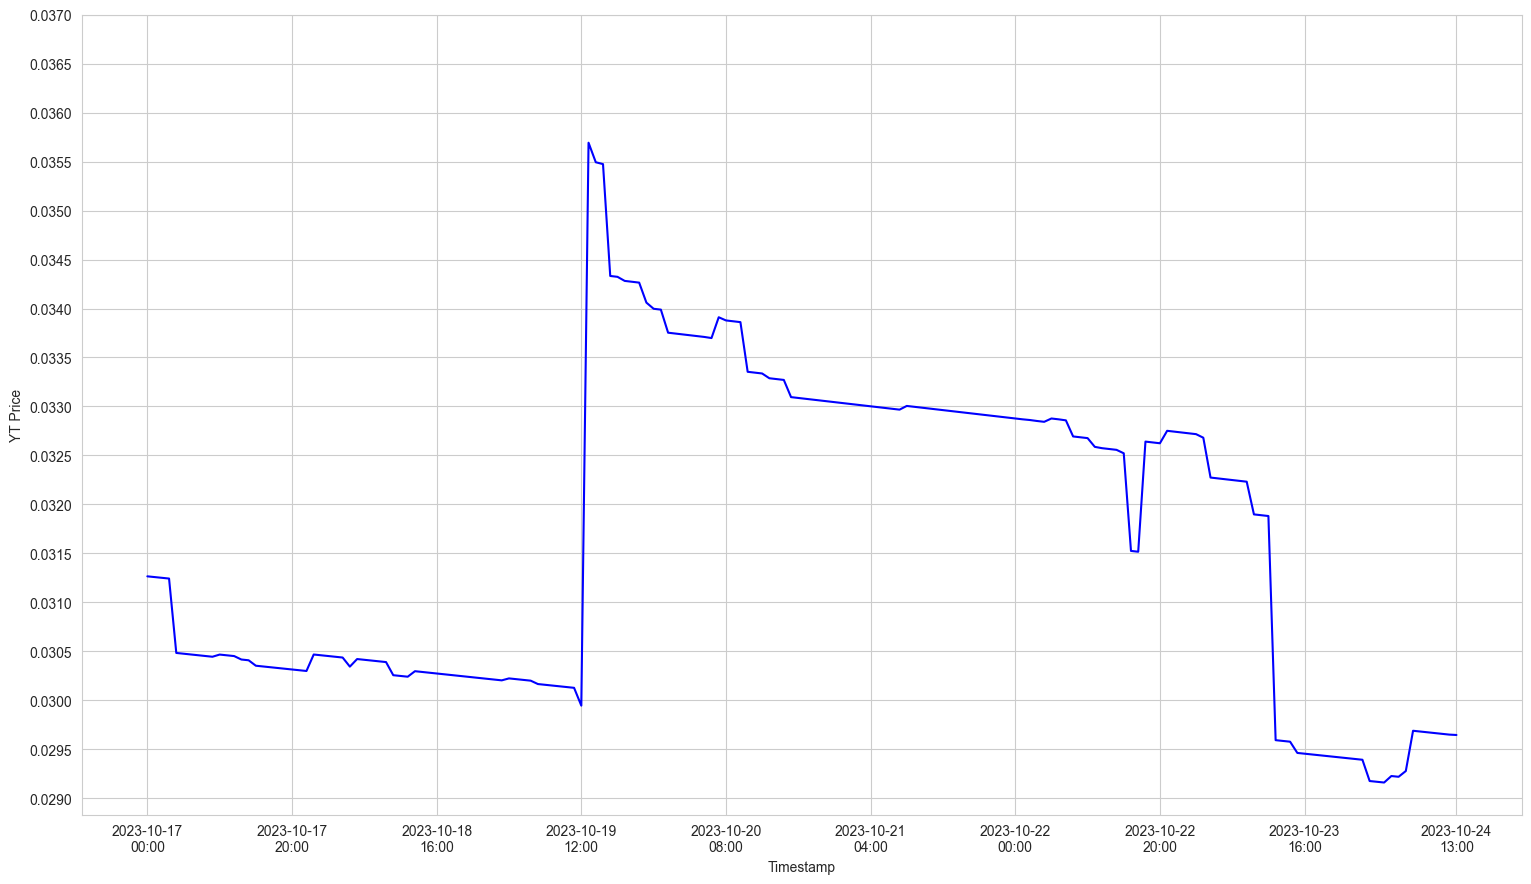

In [13]:
sns.set_style('whitegrid')

fig1 = plt.figure(figsize=(18,10))

ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])

# ax1.plot(df['Timestamp'], df['PT Px'], color='red')
ax1.plot(df['Timestamp'], df['YT Px'], color='blue')

s, e = ax1.get_ylim()
ax1.set_yticks(np.arange(round(s, 2) - 0.001,e + 0.001,0.0005))


plt.xticks(new_labels, new_labels_final)

plt.xlabel('Timestamp')
plt.ylabel('YT Price')

plt.show()

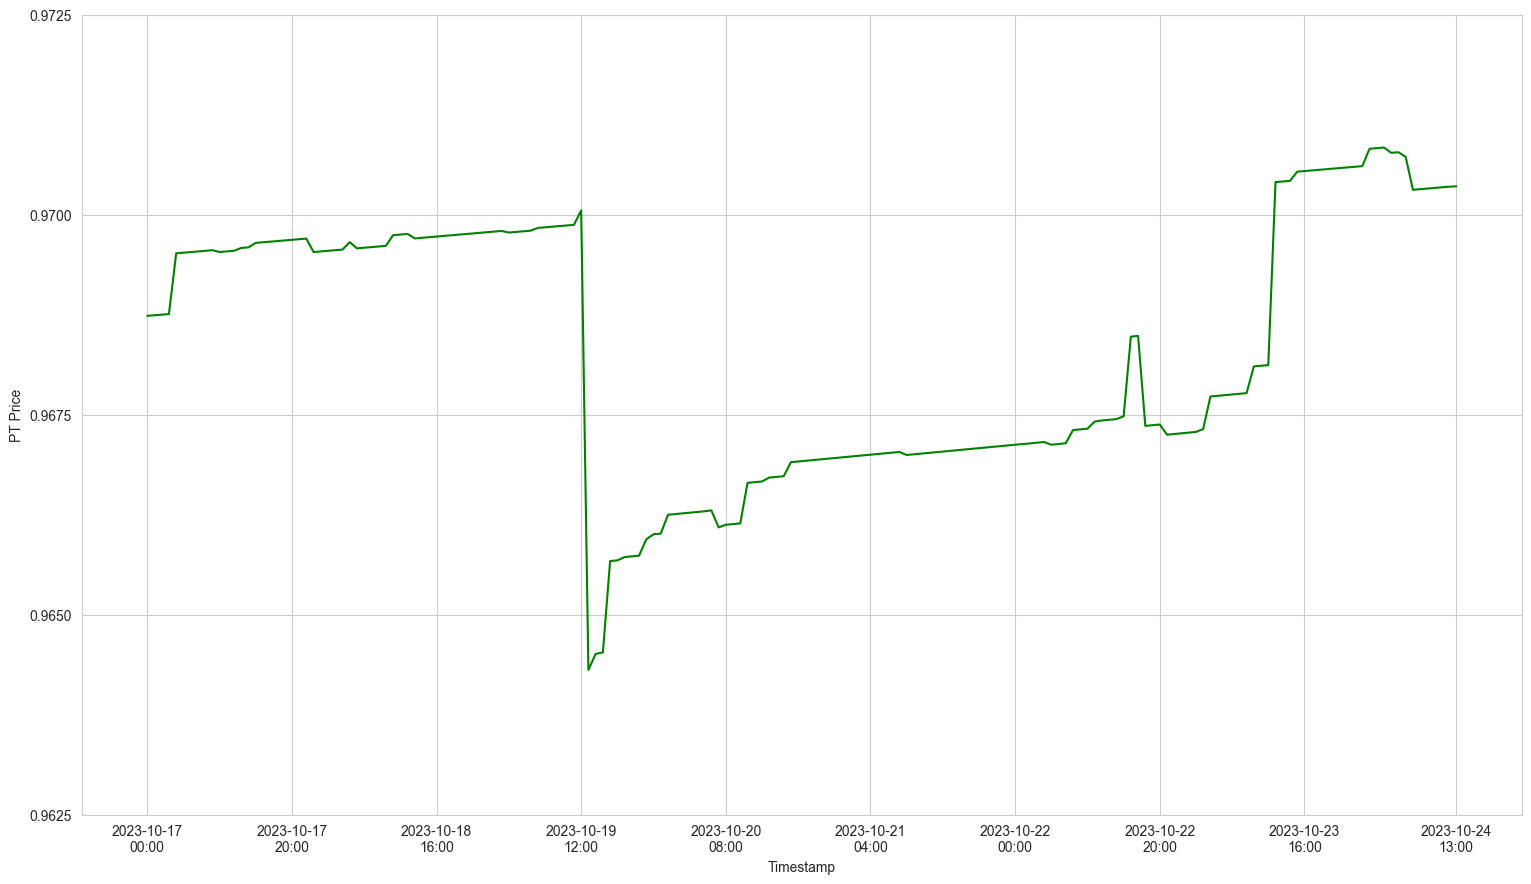

In [14]:
sns.set_style('whitegrid')

fig1 = plt.figure(figsize=(18,10))

ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])

# ax1.plot(df['Timestamp'], df['PT Px'], color='red')
ax1.plot(df['Timestamp'], df['PT Px'], color='green')

s, e = ax1.get_ylim()
ax1.set_yticks(np.arange(round(s, 2) + 0.0025,e + 0.0025,0.0025))


plt.xticks(new_labels, new_labels_final)

plt.xlabel('Timestamp')
plt.ylabel('PT Price')

plt.show()

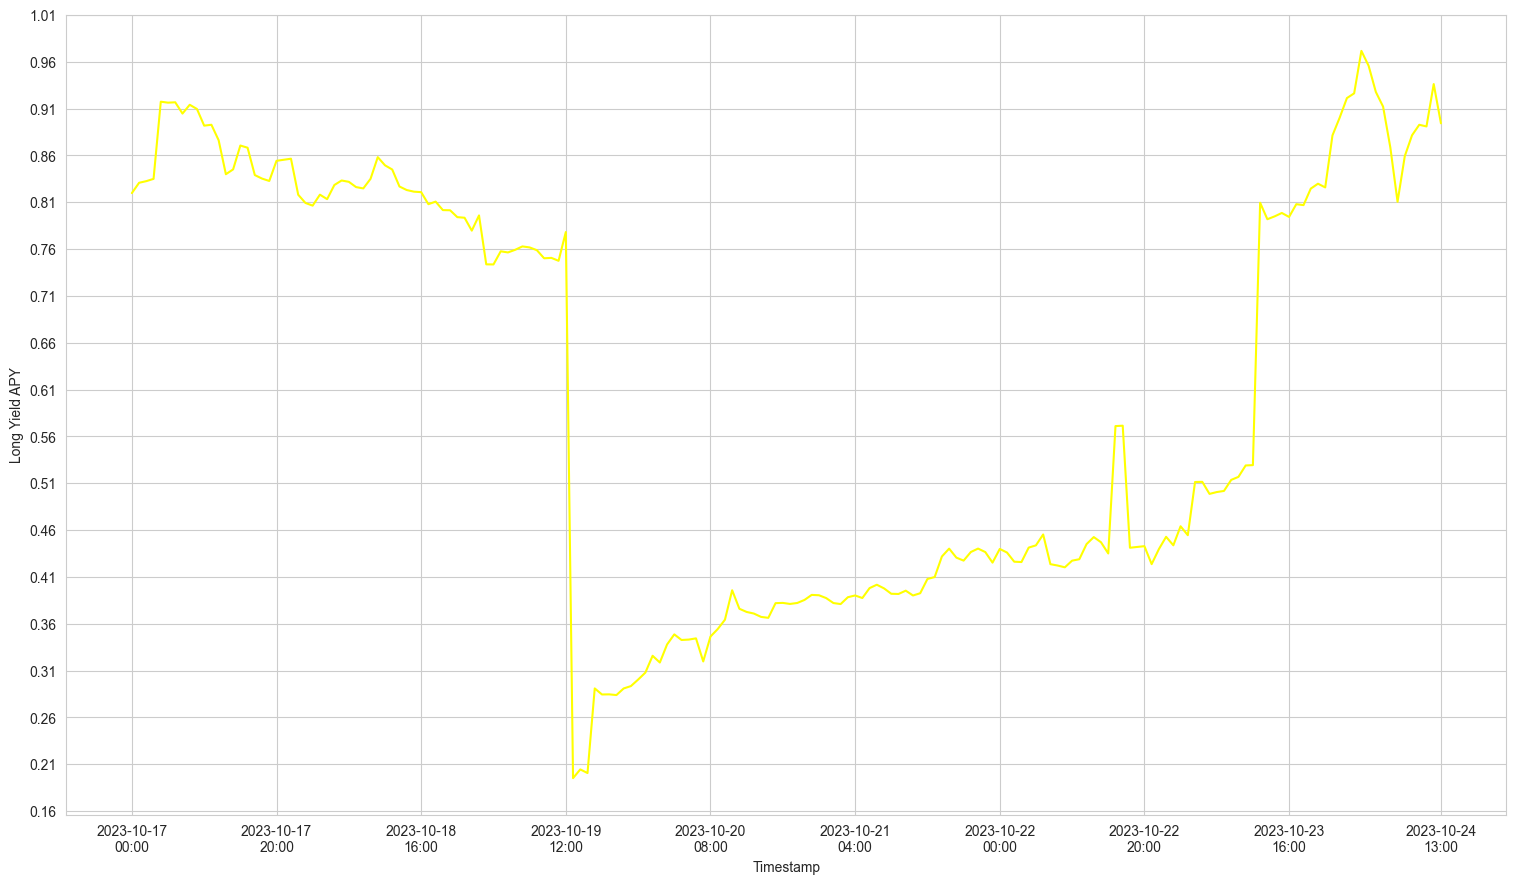

In [15]:
sns.set_style('whitegrid')

fig1 = plt.figure(figsize=(18,10))

ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])

# ax1.plot(df['Timestamp'], df['PT Px'], color='red')
ax1.plot(df['Timestamp'], df['LongYield APY'], color='yellow')

s, e = ax1.get_ylim()
ax1.set_yticks(np.arange(round(s, 2),e,0.05))


plt.xticks(new_labels, new_labels_final)

plt.xlabel('Timestamp')
plt.ylabel('Long Yield APY')

plt.show()

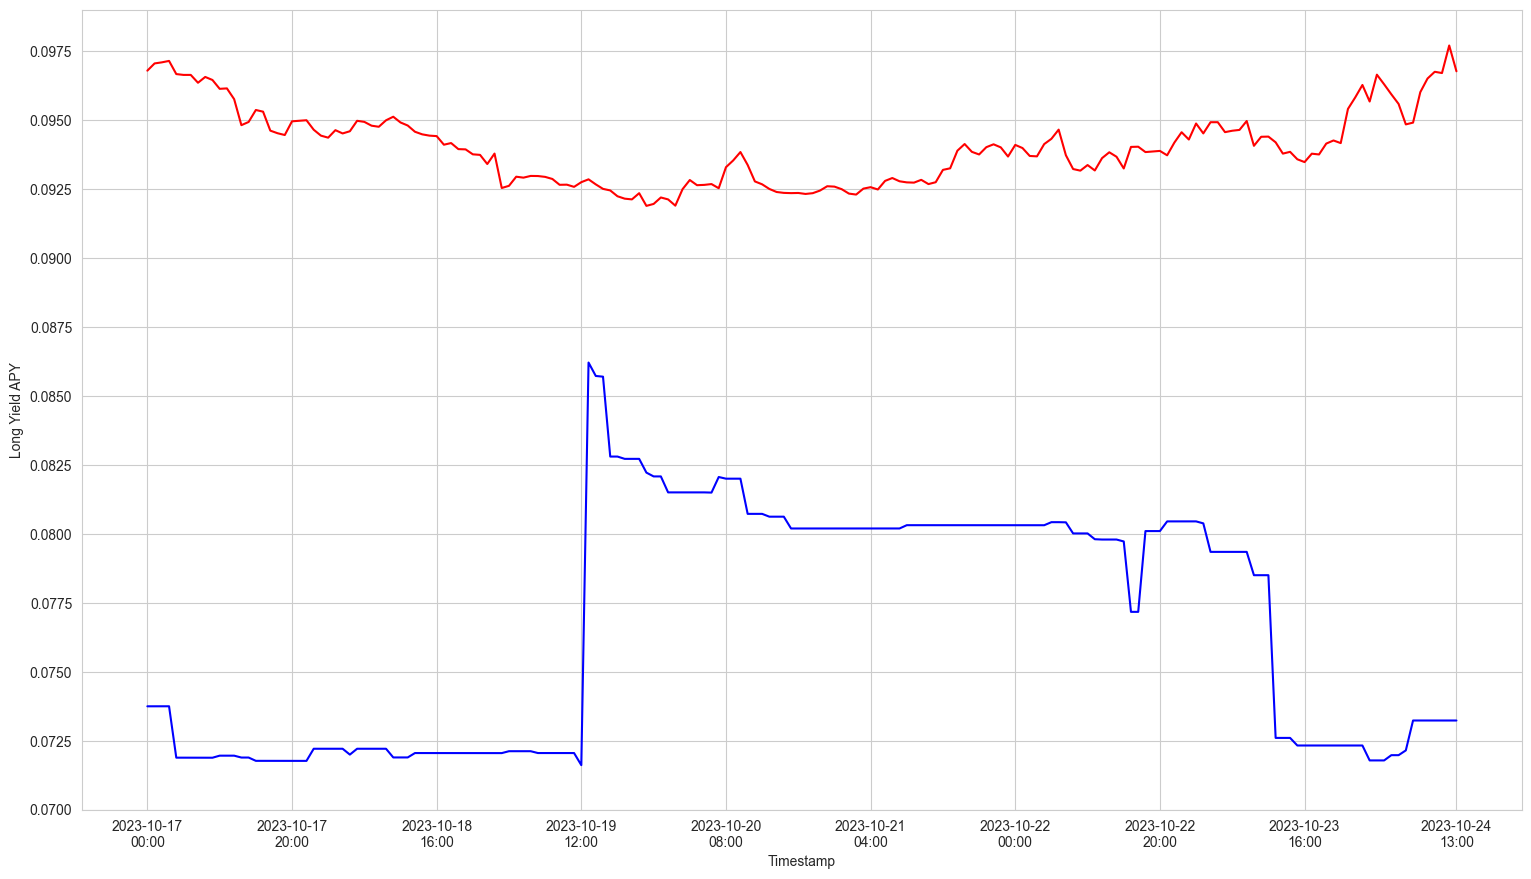

In [16]:
sns.set_style('whitegrid')

fig1 = plt.figure(figsize=(18,10))

ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])

# ax1.plot(df['Timestamp'], df['PT Px'], color='red')
ax1.plot(df['Timestamp'], df['Underlying APY'], color='red')
ax1.plot(df['Timestamp'], df['Implied APY'], color='blue')



s, e = ax1.get_ylim()
ax1.set_yticks(np.arange(round(s, 2),e,0.0025))


plt.xticks(new_labels, new_labels_final)

plt.xlabel('Timestamp')
plt.ylabel('Long Yield APY')

plt.show()